### Importing necessary packages

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.cm as cm
import scipy.stats as stats

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

AxesLabel, TickLabel = [10, 10]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})

### Function to find index of the nearest value

In [38]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

### Importing HDF5 file

In [39]:
import h5py

with h5py.File("RB_vz_planes.h5","r") as f:
    print(list(f.keys()))
    
with h5py.File("coords.h5","r") as f:
    print(list(f.keys()))

['var']
['x', 'y', 'z']


In [40]:
with h5py.File("RB_vz_planes.h5","r") as f:
    uz = f["var"][()].T

with h5py.File("coords.h5","r") as f:
    x = f["x"][()]
    y = f["y"][()]
    z = f["z"][()]

### Calculating $u_z$ at each planes

In [41]:
uz_005 = uz[find_nearest(x, value=0.005),:,:]
uz_25 = uz[find_nearest(x, value=0.25),:,:]
uz_5 = uz[find_nearest(x, value=0.5),:,:]

### Calculating RMS of the velocity perturbation for each planes

In [48]:
variance_005 = np.var(uz_005.flatten())
variance_25 = np.var(uz_25.flatten())
variance_5 = np.var(uz_5.flatten())

# Square root of variance is RMS
uRMS_005 = variance_005**0.5
uRMS_25 = variance_25**0.5
uRMS_5 = variance_5**0.5
            
print("RMS of the velocity perturbation of plane x = 0.005 is %f" % uRMS_005)
print("RMS of the velocity perturbation of plane x = 0.25 is %f" % uRMS_25)
print("RMS of the velocity perturbation of plane x = 0.5 is %f" % uRMS_5)

RMS of the velocity perturbation of plane x = 0.005 is 0.039879
RMS of the velocity perturbation of plane x = 0.25 is 0.121030
RMS of the velocity perturbation of plane x = 0.5 is 0.107600


### Probability Density Functions $(x=0.005)$

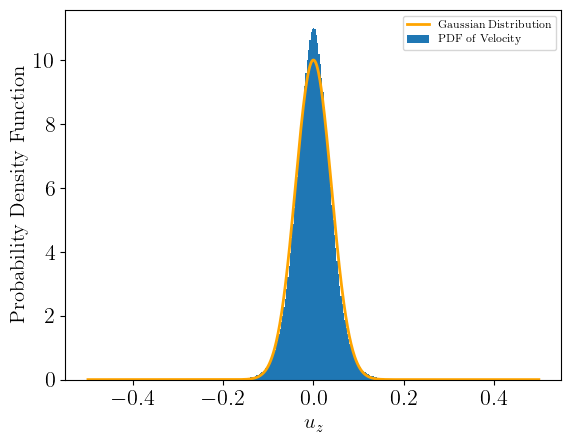

In [60]:
AxesLabel1, TickLabel1 = [15, 16]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

uz_mean = np.mean(uz_005)
            
std_dev = np.std(uz_005)

hist, bin_edges = np.histogram(uz_005, bins=200, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist / np.sum(hist)

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], label='PDF of Velocity')
x_values = np.linspace(-0.5, 0.5, 1000)  
plt.plot(x_values, stats.norm.pdf(x_values, uz_mean, std_dev), 'orange', label='Gaussian Distribution', linewidth = 2)
plt.legend(fontsize = 8)
plt.xlabel(r'$u_z$')
plt.ylabel('Probability Density Function')
plt.savefig('RBPlot/fig_4.2a.pdf', bbox_inches='tight')
plt.show()

### Probability Density Functions $(x=0.25)$

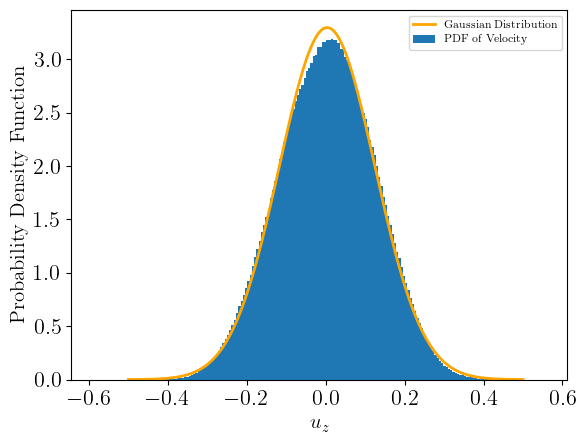

In [61]:
AxesLabel1, TickLabel1 = [15, 16]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

uz_mean = np.mean(uz_25)
            
std_dev = np.std(uz_25)

hist, bin_edges = np.histogram(uz_25, bins=200, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist / np.sum(hist)

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], label='PDF of Velocity')
x_values = np.linspace(-0.5, 0.5, 1000)  
plt.plot(x_values, stats.norm.pdf(x_values, uz_mean, std_dev), 'orange', label='Gaussian Distribution', linewidth=2)
plt.legend(fontsize = 8)
plt.xlabel(r'$u_z$')
plt.ylabel('Probability Density Function')
plt.savefig('RBPlot/fig_4.2b.pdf', bbox_inches='tight')
plt.show()

### Probability Density Functions $(x=0.5)$

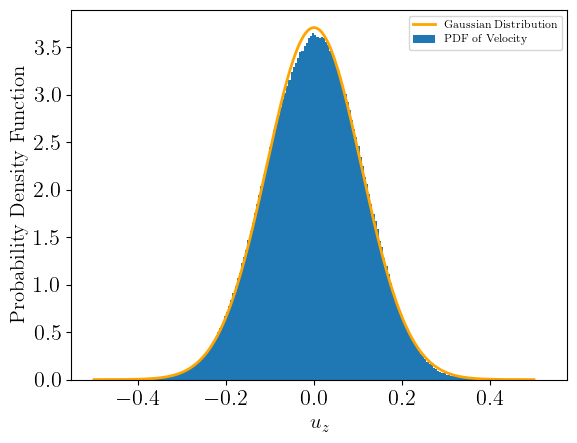

In [62]:
AxesLabel1, TickLabel1 = [15, 16]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

uz_mean = np.mean(uz_5)
            
std_dev = np.std(uz_5)

hist, bin_edges = np.histogram(uz_5, bins=200, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist / np.sum(hist)

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], label='PDF of Velocity')
x_values = np.linspace(-0.5, 0.5, 1000)  
plt.plot(x_values, stats.norm.pdf(x_values, uz_mean, std_dev), 'orange', label='Gaussian Distribution', linewidth=2)
plt.legend(fontsize = 8)
plt.xlabel(r'$u_z$')
plt.ylabel('Probability Density Function')
plt.savefig('RBPlot/fig_4.2c.pdf', bbox_inches='tight')
plt.show()

### Structure function

In [63]:
def structure_funs(v_plane, y, z):
    
    # Preallocate arrays to store the structure functions in
    N = 1000
    D1r, D2r, D3r, D4r, R = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
    Nr = np.zeros(N)
    
    # We will consider radius values between 0 and 10
    r_edges = np.linspace(0,10,N+1)
    
    # Choose number of sample points to calculate structure function around in each direction
    num_samples = 5
    
    # Get dimensions of plane
    ny, nz = v_plane.shape
    
    for k in range(num_samples**2):
        if k % num_samples == num_samples - 1:
            v_plane = np.roll(v_plane, ny//num_samples, axis=1)
        else:
            v_plane = np.roll(v_plane, nz//num_samples, axis=0)
        
        for i in range(ny//4, 3*ny//4):
            for j in range(nz//4, 3*nz//4):
                r = ((y[ny//2] - y[i])**2 + (z[nz//2] - z[j])**2)**(1/2)
                
                n = int(r*N/16)
                
                D1r[n] += (v_plane[i,j] - v_plane[ny//2, nz//2])**2
                D2r[n] += (v_plane[i,j] - v_plane[ny//2, nz//2])**4
                D3r[n] += (v_plane[i,j] - v_plane[ny//2, nz//2])**6
                D4r[n] += (v_plane[i,j] - v_plane[ny//2, nz//2])**8
                R[n] += r
          
                Nr[n] += 1
                
        print("Loop %i completed" % k)
        
    for p in range(N):
        if Nr[p] != 0:
            D1r[p] = D1r[p]/Nr[p]
            D2r[p] = D2r[p]/Nr[p]
            D3r[p] = D3r[p]/Nr[p]
            D4r[p] = D4r[p]/Nr[p]
            R[p] = R[p]/Nr[p]
        else:
            D1r[p] = 0
            D2r[p] = 0
            D3r[p] = 0
            D4r[p] = 0
            R[p] = 0
        
    return D1r, D2r, D3r, D4r, R

In [64]:
D1r_005, D2r_005, D3r_005, D4r_005,R = structure_funs(uz[find_nearest(x, value=0.005),:,:], y, z)
D1r_25, D2r_25, D3r_25, D4r_25,R = structure_funs(uz[find_nearest(x, value=0.25),:,:], y, z)
D1r_5, D2r_5, D3r_5, D4r_5,R = structure_funs(uz[find_nearest(x, value=0.5),:,:], y, z)

Loop 0 completed
Loop 1 completed
Loop 2 completed
Loop 3 completed
Loop 4 completed
Loop 5 completed
Loop 6 completed
Loop 7 completed
Loop 8 completed
Loop 9 completed
Loop 10 completed
Loop 11 completed
Loop 12 completed
Loop 13 completed
Loop 14 completed
Loop 15 completed
Loop 16 completed
Loop 17 completed
Loop 18 completed
Loop 19 completed
Loop 20 completed
Loop 21 completed
Loop 22 completed
Loop 23 completed
Loop 24 completed
Loop 0 completed
Loop 1 completed
Loop 2 completed
Loop 3 completed
Loop 4 completed
Loop 5 completed
Loop 6 completed
Loop 7 completed
Loop 8 completed
Loop 9 completed
Loop 10 completed
Loop 11 completed
Loop 12 completed
Loop 13 completed
Loop 14 completed
Loop 15 completed
Loop 16 completed
Loop 17 completed
Loop 18 completed
Loop 19 completed
Loop 20 completed
Loop 21 completed
Loop 22 completed
Loop 23 completed
Loop 24 completed
Loop 0 completed
Loop 1 completed
Loop 2 completed
Loop 3 completed
Loop 4 completed
Loop 5 completed
Loop 6 completed
L

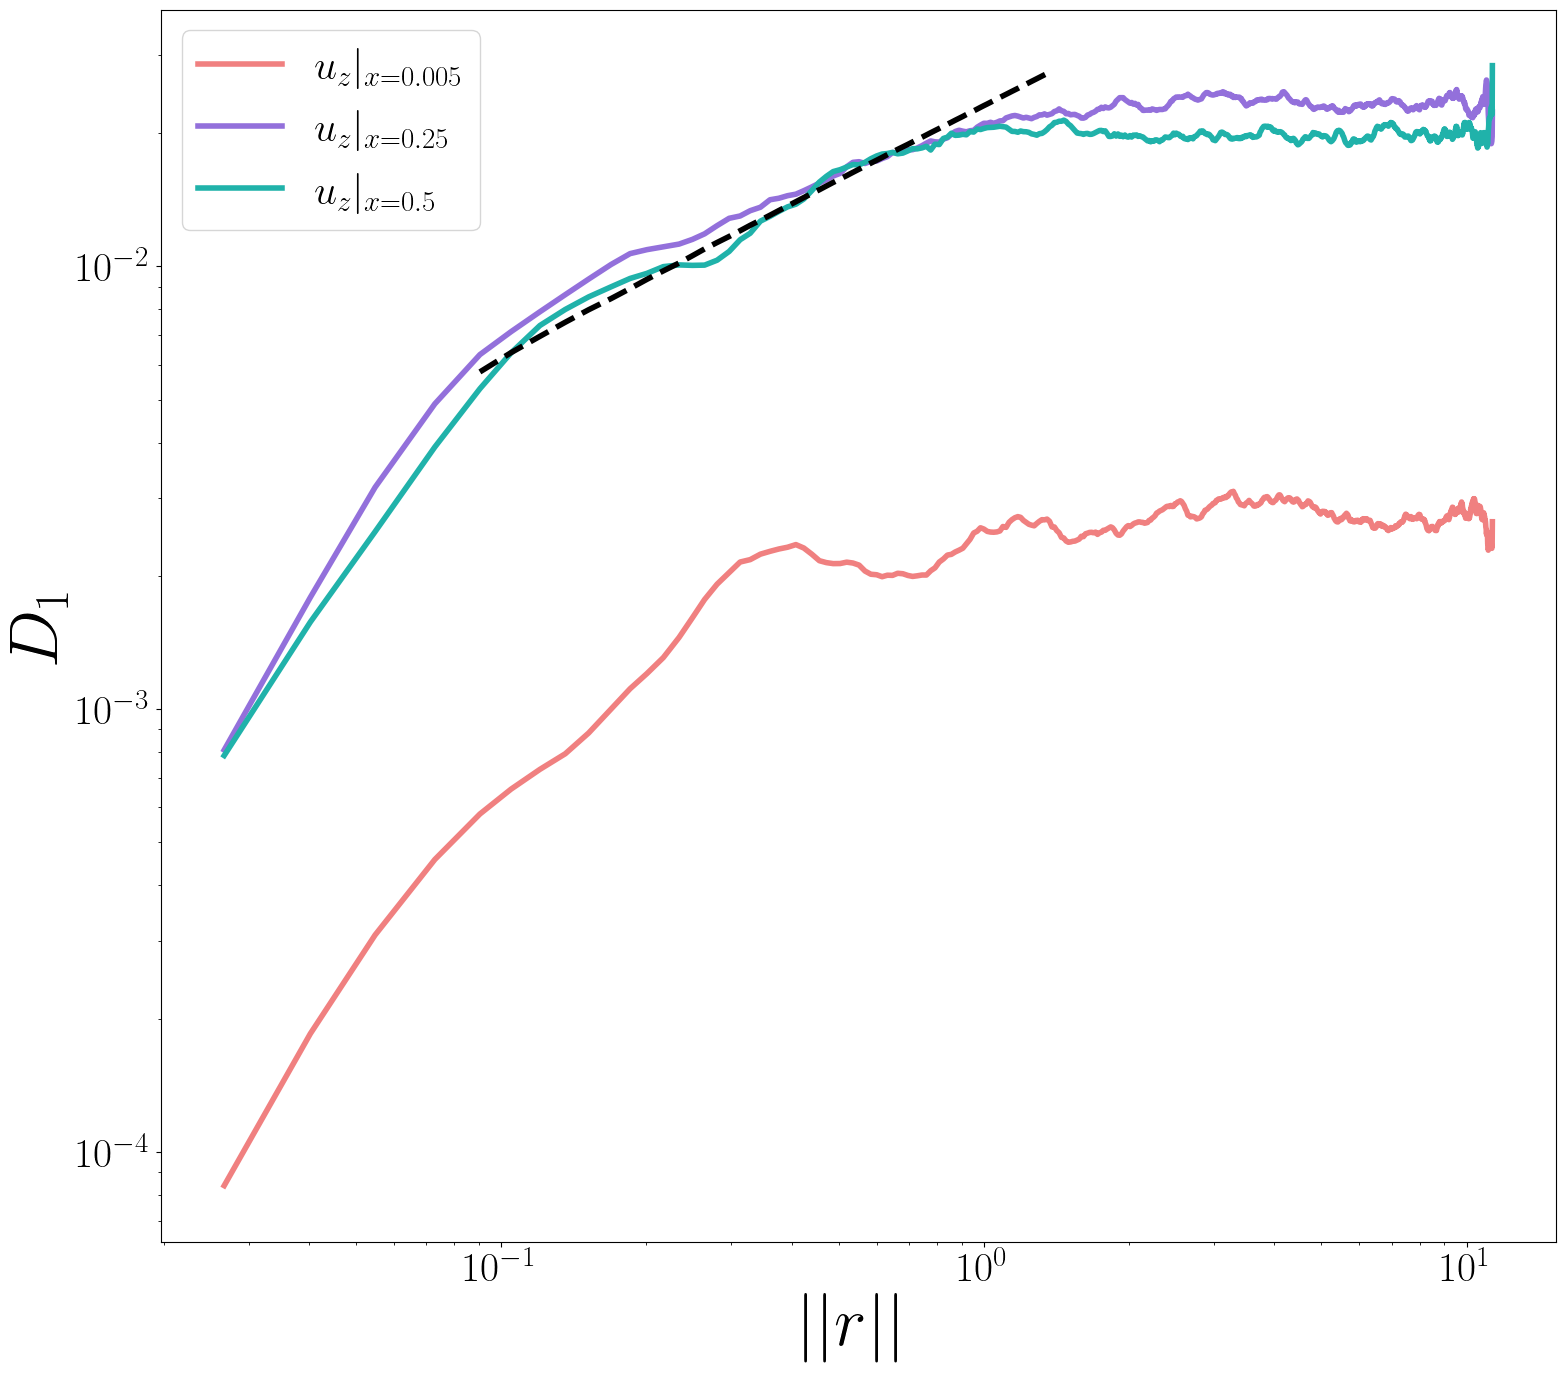

In [74]:
AxesLabel1, TickLabel1 = [50, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

fig, ax = plt.subplots(1, figsize=(18, 16))
ax.loglog(R[1:708], D1r_005[1:708], 'lightcoral', label=r'$u_z|_{x=0.005}$', linewidth=4)
ax.loglog(R[1:708], D1r_25[1:708], 'mediumpurple', label=r'$u_z|_{x=0.25}$', linewidth=4)
ax.loglog(R[1:708], D1r_5[1:708], 'lightseagreen', label=r'$u_z|_{x=0.5}$', linewidth=4)
ax.loglog(R[5:85], 0.024*(r[5:85]**(0.55)), 'k--', linewidth=4)
# ax.loglog(R[5:100], 0.0215*(r[5:100]**(2/3)), 'r--', label=r'$D_1 \sim r^{2/3}$', linewidth=4)
ax.set_xlabel(r'$||r||$')
ax.set_ylabel(r'$D_1$')
ax.legend(loc='upper left', fontsize=30)

plt.savefig('RBPlot/fig4.4a.pdf', bbox_inches='tight')

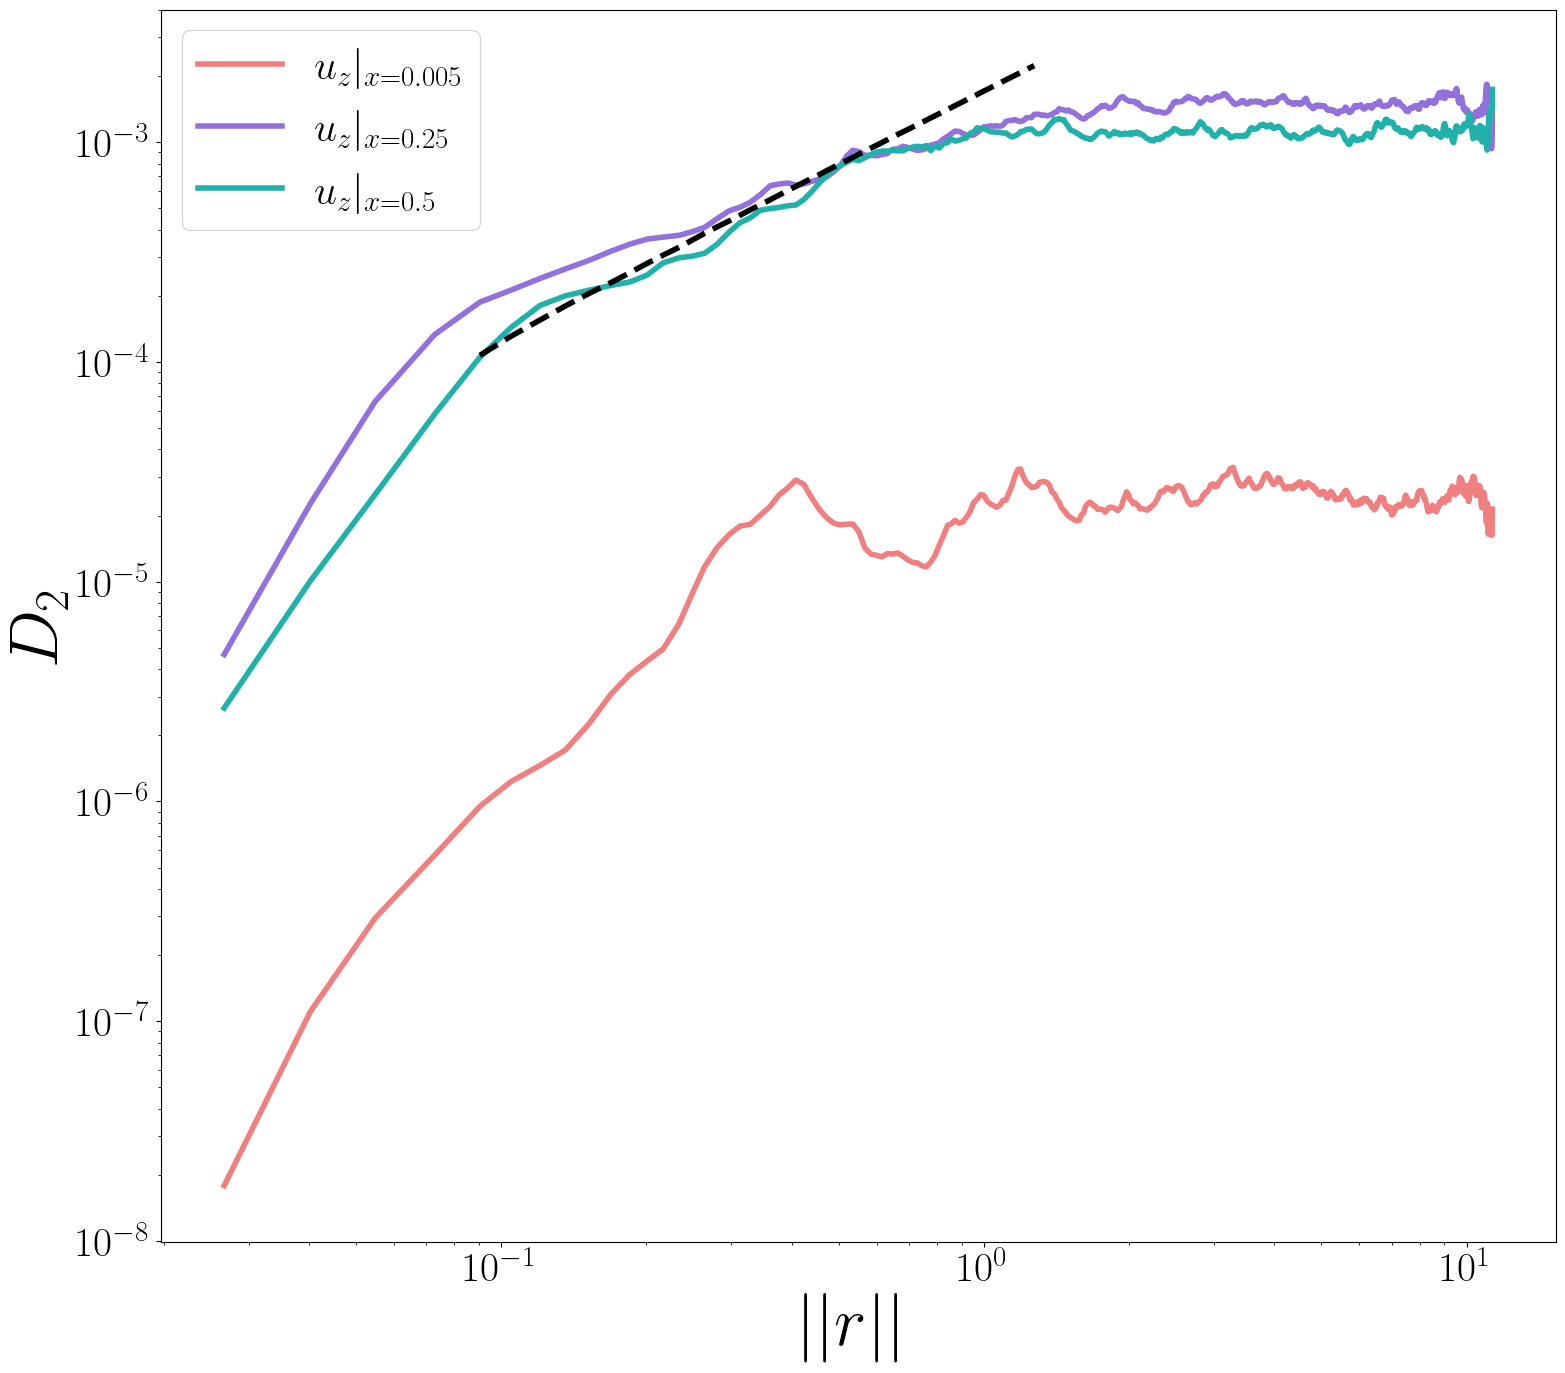

In [84]:
AxesLabel1, TickLabel1 = [50, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

fig, ax = plt.subplots(1, figsize=(18, 16))
ax.loglog(R[1:708], D2r_005[1:708], 'lightcoral', label=r'$u_z|_{x=0.005}$', linewidth=4)
ax.loglog(R[1:708], D2r_25[1:708], 'mediumpurple', label=r'$u_z|_{x=0.25}$', linewidth=4)
ax.loglog(R[1:708], D2r_5[1:708], 'lightseagreen', label=r'$u_z|_{x=0.5}$', linewidth=4)
ax.loglog(R[5:80], 0.00185*(r[5:80]**(1.1)), 'k--', linewidth=4)
ax.set_xlabel(r'$||r||$')
ax.set_ylabel(r'$D_2$')
ax.legend(loc='upper left', fontsize=30)

plt.savefig('RBPlot/fig4.4b.pdf', bbox_inches='tight')

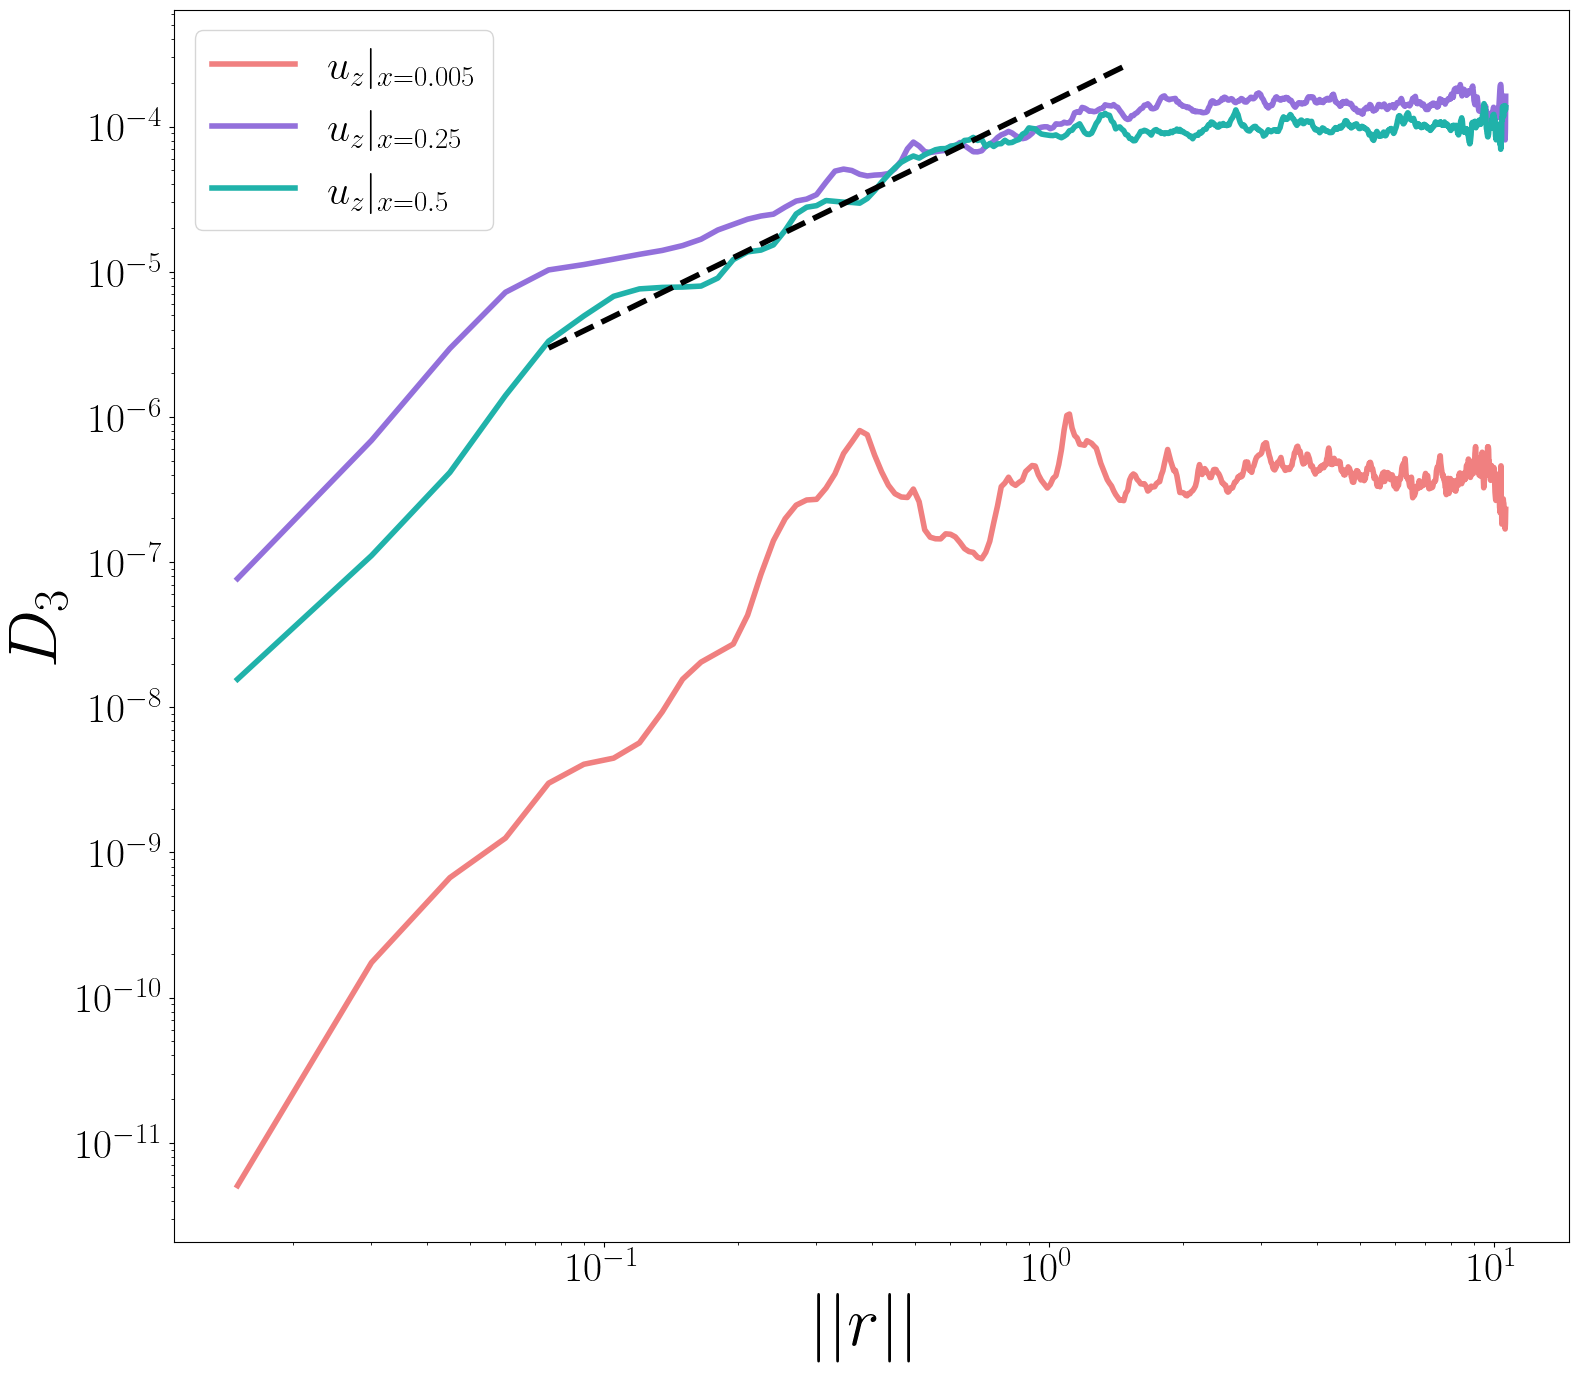

In [85]:
AxesLabel1, TickLabel1 = [50, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

r = np.linspace(0, 15, num=1000)

fig, ax = plt.subplots(1, figsize=(18, 16))
ax.loglog(r[1:708], D3r_005[1:708], 'lightcoral', label=r'$u_z|_{x=0.005}$', linewidth=4)
ax.loglog(r[1:708], D3r_25[1:708], 'mediumpurple', label=r'$u_z|_{x=0.25}$', linewidth=4)
ax.loglog(r[1:708], D3r_5[1:708], 'lightseagreen', label=r'$u_z|_{x=0.5}$', linewidth=4)
ax.loglog(r[5:100], 0.000145*(r[5:100]**(1.5)), 'k--', linewidth=4)
ax.set_xlabel(r'$||r||$')
ax.set_ylabel(r'$D_3$')
ax.legend(loc='upper left', fontsize=30)

plt.savefig('RBPlot/fig4.4c.pdf', bbox_inches='tight')

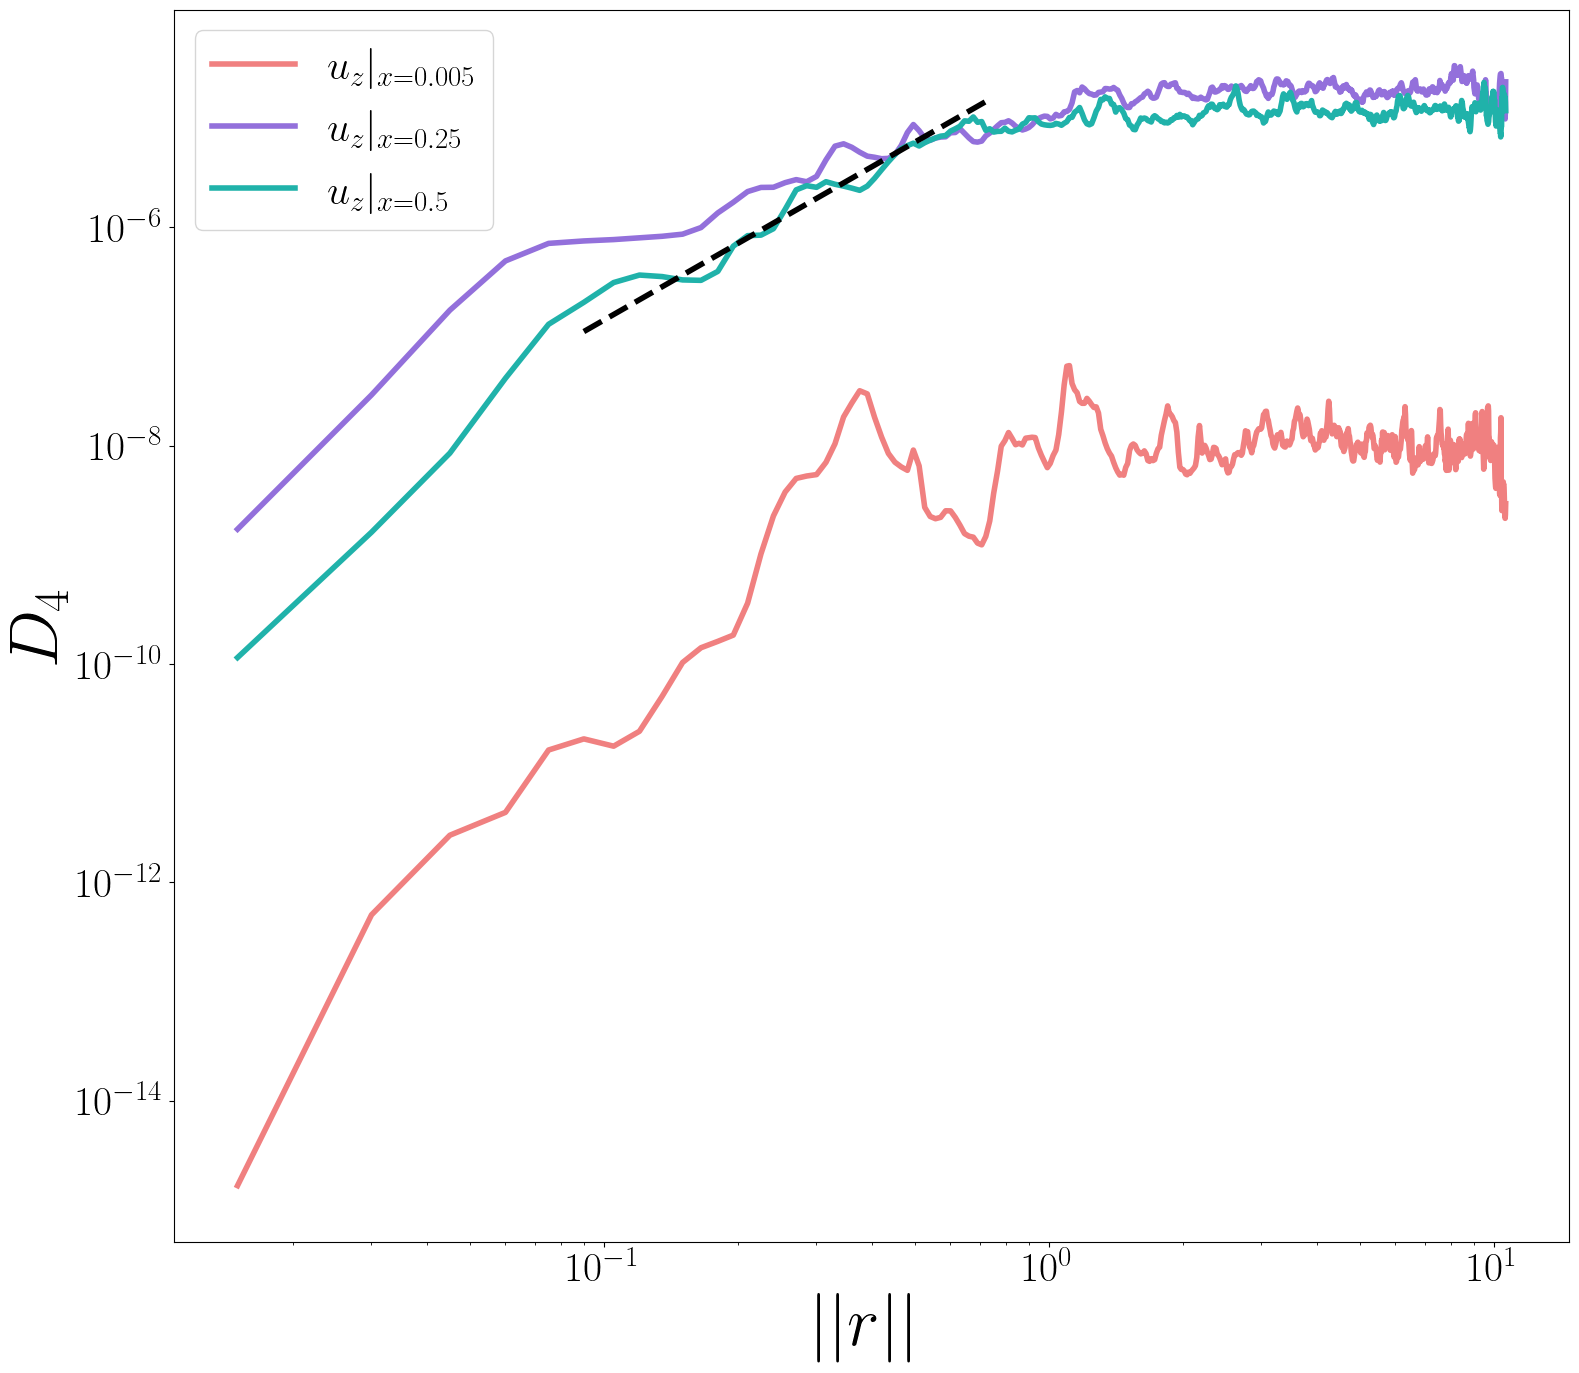

In [96]:
AxesLabel1, TickLabel1 = [50, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

r = np.linspace(0, 15, num=1000)

fig, ax = plt.subplots(1, figsize=(18, 16))
ax.loglog(r[1:708], D4r_005[1:708], 'lightcoral', label=r'$u_z|_{x=0.005}$', linewidth=4)
ax.loglog(r[1:708], D4r_25[1:708], 'mediumpurple', label=r'$u_z|_{x=0.25}$', linewidth=4)
ax.loglog(r[1:708], D4r_5[1:708], 'lightseagreen', label=r'$u_z|_{x=0.5}$', linewidth=4)
# ax.loglog(r[9:100], 0.0000115*(r[9:100]**(4/3)), 'k--', label=r'$D_1 \sim r^{4/3}$', linewidth=4)
ax.loglog(r[6:50], 0.0000305*(r[6:50]**(7/3)), 'k--', linewidth=4)
ax.set_xlabel(r'$||r||$')
ax.set_ylabel(r'$D_4$')
ax.legend(loc='upper left', fontsize=30)

plt.savefig('RBPlot/fig_4.4d.pdf', bbox_inches='tight')